# NLP701@MBZUAI Fall 2025 - Lab 01

## Today's Goal
- Python Review
  - Setup
  - Language basics
  - Introduction to NumPy
  - Introduction to NLTK
- Exercise
  - Find two datasets/corpora
  - Write a function that reads the data
  - Apply preprocessing if needed
  - Compute data statistics

# Python Basics

Python is a widely used general purpose programming language.
It is also used by major deep learning frameworks such as PyTorch and TensorFlow.

## List

Lists are mutable arrays.
Let's see how they work.

In [2]:
names = ["Eric", "Tim"]
a = 1E10
a

10000000000.0

In [3]:
# index a list by index
print(names[1])

Tim


In [4]:
# append to a list
names.append("Michael")
print(names)

['Eric', 'Tim', 'Michael']


In [5]:
# get the length of a list
print(len(names))

3


In [6]:
# concatenate two lists
names += ["Christopher", "Yoakim"]
print(names)

['Eric', 'Tim', 'Michael', 'Christopher', 'Yoakim']


In [7]:
# two ways to create an empty list
more_names = []
more_names  = list()

In [8]:
# list slicing is a useful way to access a slice of elements in a list
numbers = [0, 1, 2, 3, 4, 5, 6]

# slices from a start index (inclusive) to an end index (exclusive)
print(numbers[0:3])

[0, 1, 2]


In [9]:
# When a start index is not specified, it is understood that this is fromthe start of the list
# When a end index is not specified, it is the end of the list
print(numbers[:3])
print(numbers[5:])

[0, 1, 2]
[5, 6]


In [10]:
# A negative index wraps around, starting to count from the end of the list
print(numbers[-1])
print(numbers[-3:])
print(numbers[3:-2])

6
[4, 5, 6]
[3, 4]


## Tuple

Tuples are immutable arrays.
Let's see how they work.

In [11]:
# use parentheses for tuples, square brackets for lists
names = ("Eric", "Tim")

In [12]:
# the syntax for accessing an element and getting the length are the same as for lists
print(names[0])
print(len(names))

Eric
2


In [13]:
# however, unlike lists, tuples do not support item re-assignment
names[0] = "Michael"

TypeError: 'tuple' object does not support item assignment

In [14]:
# Create an empty tuple
empty = tuple()
print(empty)

# Create a tuple with a single item, the comma is important (otherwise, it won't be a tuple)
single = (10,)
print(single)

()
(10,)


## Dictionary

Dictionaries are hash maps.
Let's see how they work.

In [15]:
# two ways to create an empty dictionary
vocabulary = {}
vocabulary = dict()

In [16]:
# create a dictionary with one item
vocabulary = {"UNK": 0}

# add another item
vocabulary["PAD"] = 1
print(vocabulary)

{'UNK': 0, 'PAD': 1}


In [17]:
# check whether a key is in the dictionary
print("UNK" in vocabulary)
print("the" in vocabulary)

True
False


In [18]:
# get corresponding value for a key
print(vocabulary["UNK"])

0


In [19]:
# if the key is not in the dictionary, it gives an KeyError
print(vocabulary["the"])

KeyError: 'the'

In [20]:
# use get() instead to avoid this error
print(vocabulary.get("the"))

None


In [21]:
# delete an item
del vocabulary["PAD"]
print(vocabulary)

{'UNK': 0}


## Loops


In [22]:
# basic for loop
for i in range(5):
    print(i)

0
1
2
3
4


In [23]:
# to iterate over a list
names = ["Eric", "Tim", "Michael"]
for name in names:
    print(name)

Eric
Tim
Michael


In [24]:
# to iterate over indices and values in a list
# way 1
for i in range(len(names)):
    print(i, names[i])

print("---")

# way 2
for i, name in enumerate(names):
    print(i, name)

0 Eric
1 Tim
2 Michael
---
0 Eric
1 Tim
2 Michael


In [25]:
# to iterate over a dictionary
vocabulary = {"UNK": 0, "PAD": 1, "the": 2}

# 1 iterate over keys
for key in vocabulary:
    print(key)

print("---")

# 2 iterate over values
for val in vocabulary.values():
    print(val)

print("---")

# 3 Iterate over keys and values
for key, val in vocabulary.items():
    print(key, val)

UNK
PAD
the
---
0
1
2
---
UNK 0
PAD 1
the 2


# NumPy

1. The opensource library for efficient vector / matrix / tensor processing.
2. It is much more copmutationally efficient than Python lists.
3. Easy to work with multidimensional arrays and implement mathematical formulas.
4. Multidimensional, group indexing.
5. Easy to visualise.
6. Opensource replacement for matlab.

Installation: ```pip install numpy```

## Using Numpy

*There* are many ways to create an array in NumPy. One of the simplest is to create an array from ordinary Python lists or tuples using the `numpy.array()` function (remember: array is a function that creates an object of type ndarray):

In [24]:
# import numpy library
import numpy as np

In [27]:
a = np.array([1, 2, 3])

The next element of the NumPy library is an ndarray object (which means an N—dimensional array).

The `array()` function transforms nested sequences into multidimensional arrays. The type of array elements depends on the type of elements in the original sequence (but you can also redefine it at the time of creation).

In [28]:
b = np.array([[1.5, 2, 3], [4, 5, 6]])

In [29]:
print(b)

[[1.5 2.  3. ]
 [4.  5.  6. ]]


In [30]:
type(a)

numpy.ndarray

The `zeros()` function creates an array of zeros, and the `ones()` function creates an array of ones. Both functions take a tuple with dimensions and the type argument:

In [25]:
import numpy as np
a = np.zeros(3)
print(a)

[0. 0. 0.]


In [32]:
a.shape

(3,)

In [33]:
b=np.ones((2, 2, 2))

In [34]:
b.shape

(2, 2, 2)

The eye() function is used to create a 2-D array with ones on the diagonal and zeros elsewhere.

In [35]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

The `empty()` function creates an array without filling it. The original contents are random and depend on the state of memory at the time of array creation (that is, on the garbage that is stored in it):

In [36]:
np.empty((3, 3))

array([[ 6.17779239e-31, -1.23555848e-30,  3.08889620e-31],
       [-1.23555848e-30,  2.68733969e-30, -8.34001973e-31],
       [ 3.08889620e-31, -8.34001973e-31,  4.78778910e-31]])

In [37]:
np.empty((3, 3))

array([[6.17779239e-31, 1.23555848e-30, 3.08889620e-31],
       [1.23555848e-30, 2.68733969e-30, 8.34001973e-31],
       [3.08889620e-31, 8.34001973e-31, 4.78778910e-31]])

To create sequences of numbers, NumPy has an `arrange()` function, similar to the built-in Python `range()`, only instead of lists it returns arrays, and accepts not only integer values:

In [38]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [39]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In general, when using `arange()` with float type arguments, it is difficult to be sure how many elements will be received (due to the limitation of the precision of floating-point numbers). Therefore, in such cases it is usually better to use the `linspace()` function, which instead of a step takes as one of the arguments a number equal to the number of necessary elements:

In [40]:
np.linspace(0, 2, 9)  # 9 numbers from 0 to 2 inclusive

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

## Printing Arrays

If the array is too large to print, NumPy automatically hides the central part of the array and outputs only its corners.

In [41]:
print(np.arange(0, 3000, 1))

[   0    1    2 ... 2997 2998 2999]


If you really need to see the entire array, use the `numpy.set_printoptions` function:

In [42]:
import numpy as np
array = np.arange(3001)
np.set_printoptions(threshold=np.inf)
print(array)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196 

## Calculation

In [43]:
a_array = np.array ([2,4,6,8,10])
b_array = np.array ([3,6,9,12,15])

In [44]:
a_array + b_array

array([ 5, 10, 15, 20, 25])

In [45]:
a_array * b_array

array([  6,  24,  54,  96, 150])

In [48]:
a_array + 30

array([32, 34, 36, 38, 40])

In [47]:
a_array @ b_array

np.int64(330)

In [46]:
a_array * 10

array([ 20,  40,  60,  80, 100])

In [49]:
np.dot(a_array,b_array)

np.int64(330)

# NLTK

[NLTK](https://www.nltk.org/) is a comprehensive classic Python library for natural language
processing and text analytics

Paper: https://aclanthology.org/P04-3031.pdf

Installation: `pip install nltk`

In [1]:
# import nltk library
import nltk
# download a necessary package to run a tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/johncui/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

First, we can start by creating a paragraph of text.

In [2]:
para = "Mohamed bin Zayed University of Artificial Intelligence (MBZUAI) welcomed 127 new students for its fall 2022 semester. With the new joiners, the university’s student population now stands at 259."

Now, we want to split this text into sentences.
First, we need to import the sentence tokenization function, and then we can call it with the paragraph as an argument.

In [3]:
from nltk.tokenize import sent_tokenize
sent_tokenize(para)

['Mohamed bin Zayed University of Artificial Intelligence (MBZUAI) welcomed 127 new students for its fall 2022 semester.',
 'With the new joiners, the university’s student population now stands at 259.']

We now have a list of sentences that we can use for further processing.
For example, we can further split a sentence into words.
To do that, we can use the `word_tokenize()` function.

In [4]:
from nltk.tokenize import word_tokenize
sent = 'With the new joiners, the university’s student population now stands at 259.'
word_tokenize(sent)

['With',
 'the',
 'new',
 'joiners',
 ',',
 'the',
 'university',
 '’',
 's',
 'student',
 'population',
 'now',
 'stands',
 'at',
 '259',
 '.']

In [5]:
word_tokenize(para)

['Mohamed',
 'bin',
 'Zayed',
 'University',
 'of',
 'Artificial',
 'Intelligence',
 '(',
 'MBZUAI',
 ')',
 'welcomed',
 '127',
 'new',
 'students',
 'for',
 'its',
 'fall',
 '2022',
 'semester',
 '.',
 'With',
 'the',
 'new',
 'joiners',
 ',',
 'the',
 'university',
 '’',
 's',
 'student',
 'population',
 'now',
 'stands',
 'at',
 '259',
 '.']

What if the text you work with comes from Twitter?
Let's see how this tokenizer would tokenize a text with non-standard words.

In [6]:
tweet = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
word_tokenize(tweet)

['This',
 'is',
 'a',
 'cooool',
 '#',
 'dummysmiley',
 ':',
 ':',
 '-',
 ')',
 ':',
 '-P',
 '<',
 '3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '-',
 '>',
 '<',
 '--']

Note that hashtags and emoticons are split.
Depending on the genre of the text and the task, you may want to split a sentence differently.
NLTK offers `TweetTokenizer`, a tokenizer specifically designed for micro-blogging tokenization tasks.
To use this tokenizer, we first need to import the `TweetTokenizer` and create an instance for the `TweetTokenizer`, then we can call `tokenize()` method with the paragraph as an argument.

In [7]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
tokenizer.tokenize(tweet)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

We can try this with an actual corpus.
We first download a file from [OPUS](https://opus.nlpl.eu/), which is a collection of parallel corpora.
To run a bash command within a Python notebook cell, you start with the magic keyword (Jupyter instruction) `%%bash`.

In [8]:
%%bash
# download a sample corpus from OPUS
wget -O de-en.txt.zip "https://object.pouta.csc.fi/OPUS-Books/v1/moses/de-en.txt.zip"

# extract the downloaded file
unzip -o de-en.txt.zip -d .

bash: line 2: wget: command not found


Archive:  de-en.txt.zip
  inflating: ./Books.de-en.de        
  inflating: ./Books.de-en.en        
  inflating: ./Books.de-en.ids       
  inflating: ./README                


Let's look at the first 10 lines of this file.
You can also run a single bash command by adding the `!` mark before the command.

In [9]:
!head ./Books.de-en.en

Source: Project Gutenberg
Jane Eyre
Charlotte Bronte
CHAPTER I
There was no possibility of taking a walk that day.
We had been wandering, indeed, in the leafless shrubbery an hour in the morning; but since dinner (Mrs. Reed, when there was no company, dined early) the cold winter wind had brought with it clouds so sombre, and a rain so penetrating, that further out-door exercise was now out of the question.
I was glad of it: I never liked long walks, especially on chilly afternoons: dreadful to me was the coming home in the raw twilight, with nipped fingers and toes, and a heart saddened by the chidings of Bessie, the nurse, and humbled by the consciousness of my physical inferiority to Eliza, John, and Georgiana Reed.
The said Eliza, John, and Georgiana were now clustered round their mama in the drawing-room: she lay reclined on a sofa by the fireside, and with her darlings about her (for the time neither quarrelling nor crying) looked perfectly happy.
Me, she had dispensed from joini

Now, we define a function that loads this file into a list of lines using Python.

In [13]:
# write a function that reads the text file
def read_data(fpath) -> list:
    with open(fpath, mode='r') as f:
        lines =  [l.strip() for l in f.readlines()]
    return lines

Read the file and show the number of lines.

In [11]:
# read the data
un_en = read_data('./Books.de-en.en')

# check the number of instances
len(un_en)

51467

Sanity check if the number of lines is the same as the output of `wc` command.

In [12]:
!wc ././Books.de-en.en

   51467 1054732 5865632 ././Books.de-en.en


We can now split each sentence into words using the `word_tokenize` function and store its length into a new list.
We can then get the basic statistics of a given corpus.

In [14]:
sents = [word_tokenize(l) for l in un_en]

# for each tokenized sentence, calculate its length
sents_len = [len(s) for s in sents]

In [15]:
# maximum length of the tokenized sentences
max(sents_len)

458

In [16]:
# minimum length of the tokenized sentences
min(sents_len)

1

In [17]:
# average length of the tokenized sentences
sum(sents_len)/len(sents_len)

24.616744710202653

In [18]:
# number of words
sum(sents_len)

1266950

In [19]:
# calculate the number of unique words
# we use itertools.chain.from_iterable to flatten the list and take the unique

import itertools
unique_words = set(itertools.chain.from_iterable(sents))

len(unique_words)

36379

In [20]:
# type token ration (TTR)
len(unique_words)/sum(sents_len) * 100

2.8713840325190416

In [21]:
# Word frequency
def unnormalized_word_frequency(sents):
    freq = {}
    for s in sents:
        for w in s:
            if w in freq:
                freq[w] += 1
            else:
                freq[w] = 1
    return freq

word_freqs = unnormalized_word_frequency(sents)
word_freqs

{'Source': 10,
 ':': 4303,
 'Project': 7,
 'Gutenberg': 7,
 'Jane': 338,
 'Eyre': 96,
 'Charlotte': 2,
 'Bronte': 1,
 'CHAPTER': 409,
 'I': 16662,
 'There': 687,
 'was': 14280,
 'no': 2605,
 'possibility': 43,
 'of': 26982,
 'taking': 287,
 'a': 21511,
 'walk': 127,
 'that': 13677,
 'day': 974,
 '.': 45648,
 'We': 354,
 'had': 9547,
 'been': 2590,
 'wandering': 27,
 ',': 84397,
 'indeed': 189,
 'in': 15711,
 'the': 55119,
 'leafless': 7,
 'shrubbery': 4,
 'an': 2714,
 'hour': 275,
 'morning': 429,
 ';': 9342,
 'but': 5279,
 'since': 336,
 'dinner': 198,
 '(': 600,
 'Mrs.': 335,
 'Reed': 125,
 'when': 2602,
 'there': 2806,
 'company': 127,
 'dined': 24,
 'early': 108,
 ')': 599,
 'cold': 260,
 'winter': 103,
 'wind': 144,
 'brought': 355,
 'with': 9799,
 'it': 11579,
 'clouds': 59,
 'so': 3624,
 'sombre': 49,
 'and': 32921,
 'rain': 105,
 'penetrating': 17,
 'further': 134,
 'out-door': 1,
 'exercise': 37,
 'now': 2218,
 'out': 2607,
 'question': 335,
 'glad': 235,
 'never': 1056,
 'lik

In [22]:
# Top-50 words

sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:50]

[(',', 84397),
 ('the', 55119),
 ('.', 45648),
 ('and', 32921),
 ('to', 29191),
 ('of', 26982),
 ('a', 21511),
 ('I', 16662),
 ('in', 15711),
 ('he', 14541),
 ('was', 14280),
 ('that', 13677),
 ('his', 12193),
 ("''", 11898),
 ('``', 11812),
 ('it', 11579),
 ('her', 10850),
 ('with', 9799),
 ("'", 9669),
 ('had', 9547),
 ('you', 9445),
 (';', 9342),
 ('not', 8872),
 ('!', 8055),
 ('she', 7807),
 ('as', 7174),
 ('at', 7002),
 ('for', 6764),
 ('is', 6691),
 ('him', 6654),
 ('on', 6503),
 ('?', 6435),
 ("'s", 6049),
 ('said', 5497),
 ('but', 5279),
 ('be', 5071),
 ('have', 4881),
 ('me', 4609),
 ('which', 4538),
 ('all', 4417),
 (':', 4303),
 ('from', 3988),
 ('The', 3896),
 ('by', 3884),
 ('my', 3830),
 ('one', 3800),
 ('this', 3680),
 ('so', 3624),
 ('they', 3619),
 ('were', 3474)]

# Exercise

## NumPy
1. Create a 2-D array with ones on the diagonal and zeros elsewhere (Array 6)
2. Create a vector of size 10 filled with zeros, but the fifth element is 1
3. Create an array of 25 numbers from 11 to 35 inclusive
4. Calculate array a = ([5, 11, 17, 23, 29]) b = ([6, 12, 18, 24, 32]) [+, * and @] (Implement how we did it during the lab session)
5. Reshape a as (n x 1) and b as (1 x n) and perform a matrix product.
6. Reshape a as (1 x n) and b as (n x 1) and perform a matrix product. What is the difference?

## NLTK
1. Find another dataset / corpus $D$.
2. Write a function to read the data, consider each line as an individual document $d$.
3. Preprocess the data: tokenize, lowercase, and filter out stopwords: punctuation and articles.
4. Compute the statsitics: number of lines, maximum line length (in tokens), minimum line length (in tokens), average length, number of words in the corpus $n$, number of unique words, type token ratio, frequency of each word $\text{tf}(n,D)=\frac{n_w}{n}$, document frequency of words (ratio of lines that contain this word) $\text{df} = \left|\left\{d_i \in D \mid w \in d_i\right\}\right| / |D|$.
6. Present top 50 keywords in the whole corpus according to word frequency and document frequency.
7. Select 3 documents and present top 10 keywords in each document according to frequency and TF IDF. What is the difference?
$$ \text{TF-IDF} = \text{tf}(w, d) \cdot \text{idf}(w, D) $$
$$ \operatorname{idf}(w, D)=\log \frac{|D|}{\left|\left\{d_i \in D \mid w \in d_i\right\}\right|}. $$
7. (Optional) Visualize keywords of a document as a keyword cloud. Compare your cloud with the cloud obtained using the .generate(document_text) method. See examples below.

# NumPy

In [26]:
array6 = np.eye(6)
print (array6)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [27]:
# 2. Create a vector of size 10 filled with zeros, but the fifth element is 1
vector = np.zeros(10)
vector[4] = 1
print(vector)   

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [28]:
# 3. Create an array of 25 numbers from 11 to 35 inclusive
array25 = np.arange(11, 36)
print(array25)

[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35]


In [29]:
# 4. Calculate array a = ([5, 11, 17, 23, 29]) b = ([6, 12, 18, 24, 32]) [+, * and @] (Implement how we did it during the lab session)
a = np.array([5, 11, 17, 23, 29])
b = np.array([6, 12, 18, 24, 32])
print("a + b =", a + b)
print("a * b =", a * b)
print("a @ b =", a @ b)

a + b = [11 23 35 47 61]
a * b = [ 30 132 306 552 928]
a @ b = 1948


In [30]:
# 5. Reshape a as (n x 1) and b as (1 x n) and perform a matrix product.
a_reshaped = a.reshape(-1,1)
b_reshaped = b.reshape(1,-1)
matrix_product = a_reshaped @ b_reshaped
print(matrix_product)



[[ 30  60  90 120 160]
 [ 66 132 198 264 352]
 [102 204 306 408 544]
 [138 276 414 552 736]
 [174 348 522 696 928]]


In [31]:
# 6. Reshape a as (1 x n) and b as (n x 1) and perform a matrix product. What is the difference?
a_reshaped = a.reshape(1, -1)
b_reshaped = b.reshape(-1, 1)
matrix_product= a_reshaped @ b_reshaped
print(matrix_product)

# The difference is that in the first product's result each element is the product of corresponding elements from a and b,
# while the second product's result is a single value which is the dot product of a and b.

[[1948]]


# NLTK

1. Find another dataset / corpus $D$.
2. Write a function to read the data, consider each line as an individual document $d$.
3. Preprocess the data: tokenize, lowercase, and filter out stopwords: punctuation and articles.
4. Compute the statsitics: number of lines, maximum line length (in tokens), minimum line length (in tokens), average length, number of words in the corpus $n$, number of unique words, type token ratio, frequency of each word $\text{tf}(n,D)=\frac{n_w}{n}$, document frequency of words (ratio of lines that contain this word) $\text{df} = \left|\left\{d_i \in D \mid w \in d_i\right\}\right| / |D|$.
5. Present top 50 keywords in the whole corpus according to word frequency and document frequency.
6. Select 3 documents and present top 10 keywords in each document according to frequency and TF IDF. What is the difference?
$$ \text{TF-IDF} = \text{tf}(w, d) \cdot \text{idf}(w, D) $$
$$ \operatorname{idf}(w, D)=\log \frac{|D|}{\left|\left\{d_i \in D \mid w \in d_i\right\}\right|}. $$
1. (Optional) Visualize keywords of a document as a keyword cloud. Compare your cloud with the cloud obtained using the .generate(document_text) method. See examples below.

In [32]:
%%bash
# download a sample corpus from OPUS
wget -O en-hr.txt.zip "https://object.pouta.csc.fi/OPUS-TedTalks/v1/moses/en-hr.txt.zip"

# extract the downloaded file
unzip -o en-hr.txt.zip -d .

bash: line 2: wget: command not found


Archive:  en-hr.txt.zip
  inflating: ./TedTalks.en-hr.en     
  inflating: ./TedTalks.en-hr.hr     
  inflating: ./TedTalks.en-hr.ids    
  inflating: ./README                


In [33]:
# 2. Write a function to read the data, consider each line as an individual document $d$.
def read_data(fpath) -> list:
    with open(fpath, mode='r') as f:
        lines = [l.strip() for l in f.readlines()]
    return lines

tedtalks = read_data('TedTalks.en-hr.en')


In [59]:
from nltk.corpus import stopwords
import string
# 3. Preprocess the data: tokenize, lowercase, and filter out stopwords: punctuation and articles.
sents = [word_tokenize(l) for l in tedtalks]
lower_sents = [[w.lower() for w in s] for s in sents]

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
extra_stopwords = {"'s", '--', "n't", 'one', '``', "''", "'re", "'m", "'ve"}
final_stopwords = stop_words | punctuation | extra_stopwords

cleaned_sents = [[w for w in s if w not in final_stopwords] for s in lower_sents]





[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johncui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
print(tedtalks[:3])
print(sents[:3])
print(lower_sents[:3])
print(cleaned_sents[:3])

['I want you now to imagine a wearable robot that gives you superhuman abilities, or another one that takes wheelchair users up standing and walking again.', 'We at Berkeley Bionics call these robots exoskeletons.', 'These are nothing else than something that you put on in the morning, and it will give you extra strength, and it will further enhance your speed, and it will help you, for instance, to manage your balance.']
[['I', 'want', 'you', 'now', 'to', 'imagine', 'a', 'wearable', 'robot', 'that', 'gives', 'you', 'superhuman', 'abilities', ',', 'or', 'another', 'one', 'that', 'takes', 'wheelchair', 'users', 'up', 'standing', 'and', 'walking', 'again', '.'], ['We', 'at', 'Berkeley', 'Bionics', 'call', 'these', 'robots', 'exoskeletons', '.'], ['These', 'are', 'nothing', 'else', 'than', 'something', 'that', 'you', 'put', 'on', 'in', 'the', 'morning', ',', 'and', 'it', 'will', 'give', 'you', 'extra', 'strength', ',', 'and', 'it', 'will', 'further', 'enhance', 'your', 'speed', ',', 'and'

4. Compute the statsitics: number of lines, maximum line length (in tokens), minimum line length (in tokens), average length, number of words in the corpus $n$, number of unique words, type token ratio, frequency of each word $\text{tf}(n,D)=\frac{n_w}{n}$, document frequency of words (ratio of lines that contain this word) $\text{df} = \left|\left\{d_i \in D \mid w \in d_i\right\}\right| / |D|$.

In [61]:
# 4. Compute the statsitics: number of lines, maximum line length (in tokens), minimum line length (in tokens), average length, number of words in the corpus $n$, number of unique words, type token ratio, frequency of each word $\text{tf}(n,D)=\frac{n_w}{n}$, document frequency of words (ratio of lines that contain this word) $\text{df} = \left|\left\{d_i \in D \mid w \in d_i\right\}\right| / |D|$.
sents_len = [len(s) for s in cleaned_sents]
print("Number of lines:", sents_len)

max_length = max(sents_len)
print("Maximum line length:", max_length)

min_length = min(sents_len)
print("Minimum line length:", min_length)

average_length = sum(sents_len) / len(sents_len)
print("Average line length:", average_length)

total_words = sum(sents_len)
print("Total number of words:", total_words)

unique_words = len(set(itertools.chain.from_iterable(cleaned_sents)))
print("Number of unique words:", unique_words)

type_token_ratio = unique_words / total_words * 100
print("Type token ratio:", type_token_ratio)




Number of lines: [13, 5, 14, 5, 4, 3, 14, 11, 10, 7, 8, 7, 10, 1, 9, 6, 3, 3, 16, 5, 6, 9, 8, 17, 4, 6, 16, 11, 6, 11, 3, 4, 11, 4, 2, 7, 11, 2, 1, 8, 7, 5, 4, 8, 8, 4, 14, 5, 7, 12, 3, 10, 31, 7, 15, 7, 3, 3, 7, 2, 6, 7, 3, 9, 15, 11, 10, 12, 2, 5, 3, 8, 4, 3, 15, 2, 12, 4, 6, 5, 5, 3, 7, 8, 8, 13, 3, 4, 7, 6, 5, 5, 2, 2, 4, 9, 3, 3, 7, 6, 10, 6, 1, 14, 5, 5, 6, 5, 4, 6, 4, 5, 2, 4, 5, 7, 14, 1, 2, 3, 6, 7, 4, 1, 7, 3, 1, 3, 6, 11, 6, 6, 3, 3, 2, 8, 1, 2, 7, 14, 3, 6, 5, 1, 4, 7, 10, 2, 9, 6, 6, 3, 9, 2, 1, 8, 6, 4, 18, 3, 4, 8, 4, 4, 3, 4, 3, 13, 5, 23, 7, 4, 8, 14, 5, 10, 4, 4, 2, 4, 3, 1, 3, 7, 1, 9, 8, 16, 7, 6, 3, 6, 15, 5, 10, 3, 11, 3, 5, 18, 7, 10, 8, 4, 3, 11, 8, 10, 30, 14, 3, 6, 5, 18, 1, 1, 3, 2, 4, 2, 8, 1, 6, 6, 3, 16, 8, 4, 2, 4, 10, 10, 7, 5, 5, 10, 10, 9, 14, 7, 6, 11, 7, 7, 7, 9, 13, 12, 7, 7, 2, 4, 9, 5, 4, 9, 2, 23, 4, 14, 6, 11, 9, 8, 5, 4, 5, 7, 4, 16, 3, 3, 11, 7, 6, 5, 3, 2, 3, 2, 4, 6, 5, 5, 2, 1, 2, 0, 0, 2, 1, 5, 10, 3, 7, 21, 6, 4, 3, 13, 1, 4, 8, 2, 22, 3,

In [62]:
# 4. Word frequency
word_freqs = unnormalized_word_frequency(cleaned_sents)
word_freqs

{'want': 2276,
 'imagine': 425,
 'wearable': 6,
 'robot': 148,
 'gives': 158,
 'superhuman': 2,
 'abilities': 16,
 'another': 883,
 'takes': 213,
 'wheelchair': 16,
 'users': 53,
 'standing': 111,
 'walking': 115,
 'berkeley': 10,
 'bionics': 3,
 'call': 574,
 'robots': 118,
 'exoskeletons': 2,
 'nothing': 412,
 'else': 427,
 'something': 1931,
 'put': 1076,
 'morning': 185,
 'give': 818,
 'extra': 86,
 'strength': 50,
 'enhance': 11,
 'speed': 112,
 'help': 528,
 'instance': 99,
 'manage': 47,
 'balance': 73,
 'actually': 2620,
 'true': 371,
 'integration': 15,
 'man': 561,
 'machine': 232,
 'integrate': 15,
 'network': 106,
 'universe': 406,
 'devices': 88,
 'blue': 181,
 'sky': 92,
 'thinking': 521,
 'show': 854,
 'working': 503,
 'starting': 194,
 'talking': 438,
 'american': 240,
 'soldier': 16,
 'average': 192,
 'carry': 101,
 '100': 251,
 'lbs': 6,
 'backs': 10,
 'asked': 363,
 'equipment': 57,
 'obviously': 170,
 'resulting': 4,
 'major': 151,
 'complications': 13,
 'back': 147

In [63]:
# 4. Document frequency
def unnormalized_document_frequency(data: list) -> dict:
    freq = {}
    # Implement here
    for s in data:
        unique_words = set(s)  # Get unique words in the sentence
        for w in unique_words:
            if w in freq:
                freq[w] += 1
            else:
                freq[w] = 1

    return freq
doc_freqs = unnormalized_document_frequency(cleaned_sents)
doc_freqs

{'takes': 212,
 'gives': 150,
 'walking': 113,
 'superhuman': 2,
 'wearable': 6,
 'want': 2114,
 'abilities': 16,
 'wheelchair': 16,
 'another': 853,
 'users': 53,
 'standing': 109,
 'robot': 138,
 'imagine': 413,
 'call': 562,
 'berkeley': 10,
 'bionics': 3,
 'robots': 104,
 'exoskeletons': 2,
 'speed': 107,
 'help': 499,
 'manage': 47,
 'enhance': 11,
 'morning': 179,
 'instance': 99,
 'strength': 48,
 'put': 1035,
 'extra': 84,
 'give': 785,
 'balance': 71,
 'something': 1820,
 'nothing': 401,
 'else': 419,
 'integration': 15,
 'actually': 2512,
 'machine': 219,
 'true': 352,
 'man': 511,
 'network': 100,
 'universe': 375,
 'integrate': 15,
 'devices': 82,
 'thinking': 492,
 'blue': 164,
 'sky': 86,
 'american': 227,
 'lbs': 6,
 '100': 245,
 'average': 171,
 'backs': 10,
 'soldier': 16,
 'working': 491,
 'starting': 190,
 'equipment': 55,
 'show': 834,
 'carry': 97,
 'talking': 420,
 'asked': 357,
 'major': 147,
 'percent': 716,
 'back': 1427,
 'injuries': 17,
 '30': 249,
 'chronic'

spacy

In [66]:
# 5. Top 50 words according to frequency
top_50_freq = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:50]
top_50_freq

[('people', 4784),
 ('like', 4674),
 ('know', 3567),
 ('going', 3427),
 ('see', 3168),
 ('would', 3142),
 ('think', 3140),
 ('get', 2943),
 ('really', 2884),
 ('world', 2680),
 ('actually', 2620),
 ('us', 2537),
 ('laughter', 2536),
 ('time', 2500),
 ('things', 2436),
 ('way', 2398),
 ('want', 2276),
 ('could', 2248),
 ('years', 2221),
 ('go', 2192),
 ('make', 2099),
 ('well', 2008),
 ('something', 1931),
 ('said', 1864),
 ('right', 1855),
 ('two', 1855),
 ('first', 1848),
 ('thing', 1780),
 ('much', 1710),
 ('♫', 1710),
 ('look', 1709),
 ('little', 1690),
 ('say', 1665),
 ('also', 1654),
 ('got', 1640),
 ('life', 1627),
 ('take', 1476),
 ('back', 1472),
 ('new', 1465),
 ('even', 1459),
 ('applause', 1435),
 ('work', 1427),
 ('good', 1402),
 ('need', 1365),
 ('lot', 1357),
 ('different', 1347),
 ('many', 1346),
 ('kind', 1322),
 ("'ll", 1322),
 ('around', 1320)]

In [67]:
# 5. Top 50 words according to document frequency
top_50_doc_freq = sorted(doc_freqs.items(), key=lambda x: x[1], reverse=True)[:50]
top_50_doc_freq

[('people', 4432),
 ('like', 4349),
 ('know', 3388),
 ('going', 3186),
 ('see', 3006),
 ('think', 2977),
 ('would', 2831),
 ('get', 2735),
 ('really', 2704),
 ('actually', 2512),
 ('laughter', 2485),
 ('world', 2481),
 ('time', 2388),
 ('us', 2302),
 ('way', 2258),
 ('things', 2255),
 ('want', 2114),
 ('years', 2094),
 ('go', 2084),
 ('could', 2073),
 ('make', 2003),
 ('well', 1969),
 ('something', 1820),
 ('said', 1816),
 ('first', 1783),
 ('two', 1765),
 ('right', 1762),
 ('thing', 1723),
 ('look', 1636),
 ('much', 1630),
 ('also', 1616),
 ('little', 1613),
 ('say', 1609),
 ('got', 1547),
 ('life', 1501),
 ('back', 1427),
 ('take', 1423),
 ('even', 1417),
 ('applause', 1415),
 ('work', 1347),
 ('new', 1337),
 ('good', 1312),
 ('lot', 1288),
 ('need', 1280),
 ('kind', 1272),
 ('around', 1265),
 ("'ll", 1252),
 ('many', 1240),
 ('let', 1210),
 ('different', 1180)]

In [68]:
# 6. Present top 10 keywords of three documents
def tf_idf(word_freq, doc_freq, total_docs):

    tfidf = {}
    for word, freq in word_freq.items():
        if word in doc_freq:
            idf = total_docs / doc_freq[word]
            tfidf[word] = freq * idf
        else:
            tfidf[word] = 0
    
    return tfidf

for i in range(3):
    print(f"Document {i+1}")
    doc = sents[i]

    doc_freq = unnormalized_document_frequency([doc])
    total_docs = len(sents)
    doc_tfidf = tf_idf(doc_freq, doc_freqs, total_docs)
    top_10 = sorted(doc_tfidf.items(), key=lambda x: x[1], reverse=True)[:10]
    print(top_10)
    
    # Implement your code here
    # doc_freqs = ...
    # doc_tfidf = ...
    # top_10 = ... 
    # print(top_10)

Document 1
[('superhuman', 43174.0), ('wearable', 14391.333333333334), ('abilities', 5396.75), ('wheelchair', 5396.75), ('users', 1629.2075471698113), ('standing', 792.183486238532), ('walking', 764.141592920354), ('robot', 625.7101449275362), ('gives', 575.6533333333333), ('takes', 407.3018867924528)]
Document 2
[('exoskeletons', 43174.0), ('robots', 830.2692307692307), ('call', 153.644128113879), ('these', 0), ('at', 0), ('.', 0), ('We', 0), ('Bionics', 0), ('Berkeley', 0)]
Document 3
[('enhance', 7849.818181818182), ('manage', 1837.1914893617022), ('strength', 1798.9166666666667), ('balance', 1216.1690140845071), ('extra', 1027.952380952381), ('instance', 872.2020202020202), ('speed', 806.9906542056075), ('morning', 482.39106145251395), ('nothing', 215.33167082294264), ('else', 206.08114558472553)]


In [69]:
# 7. (Optional) Present keywords via a word cloud

!pip install wordcloud

Mukund

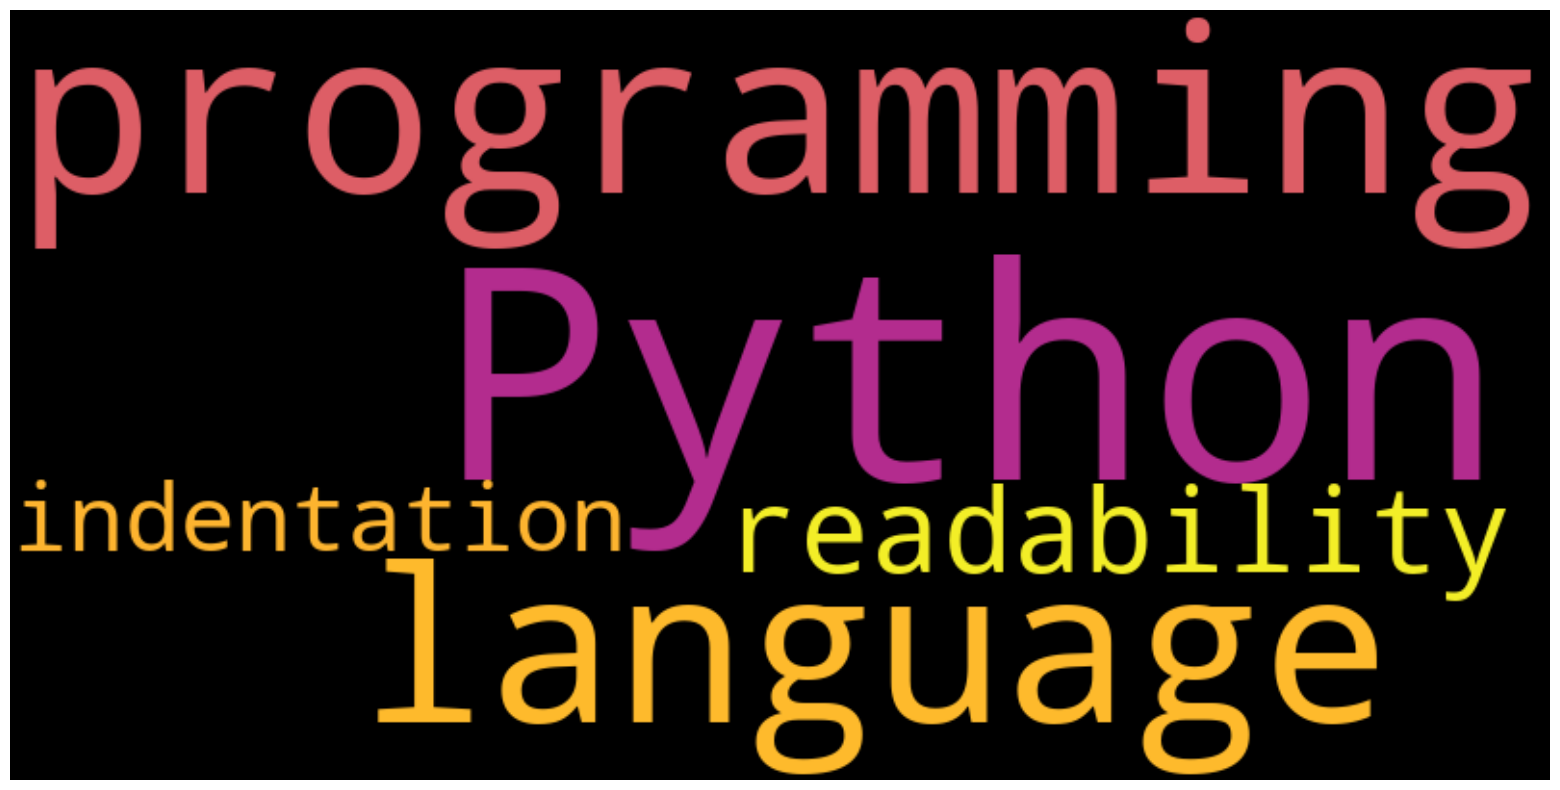

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample words
word_frequencies = {"Python": 0.9, "programming": 0.8, "language": 0.7, "readability": 0.6, "indentation": 0.5}

# Create a WordCloud object with custom configurations
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    colormap='plasma',
    max_words=100, 
    contour_width=3, 
    contour_color='steelblue'
).fit_words(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

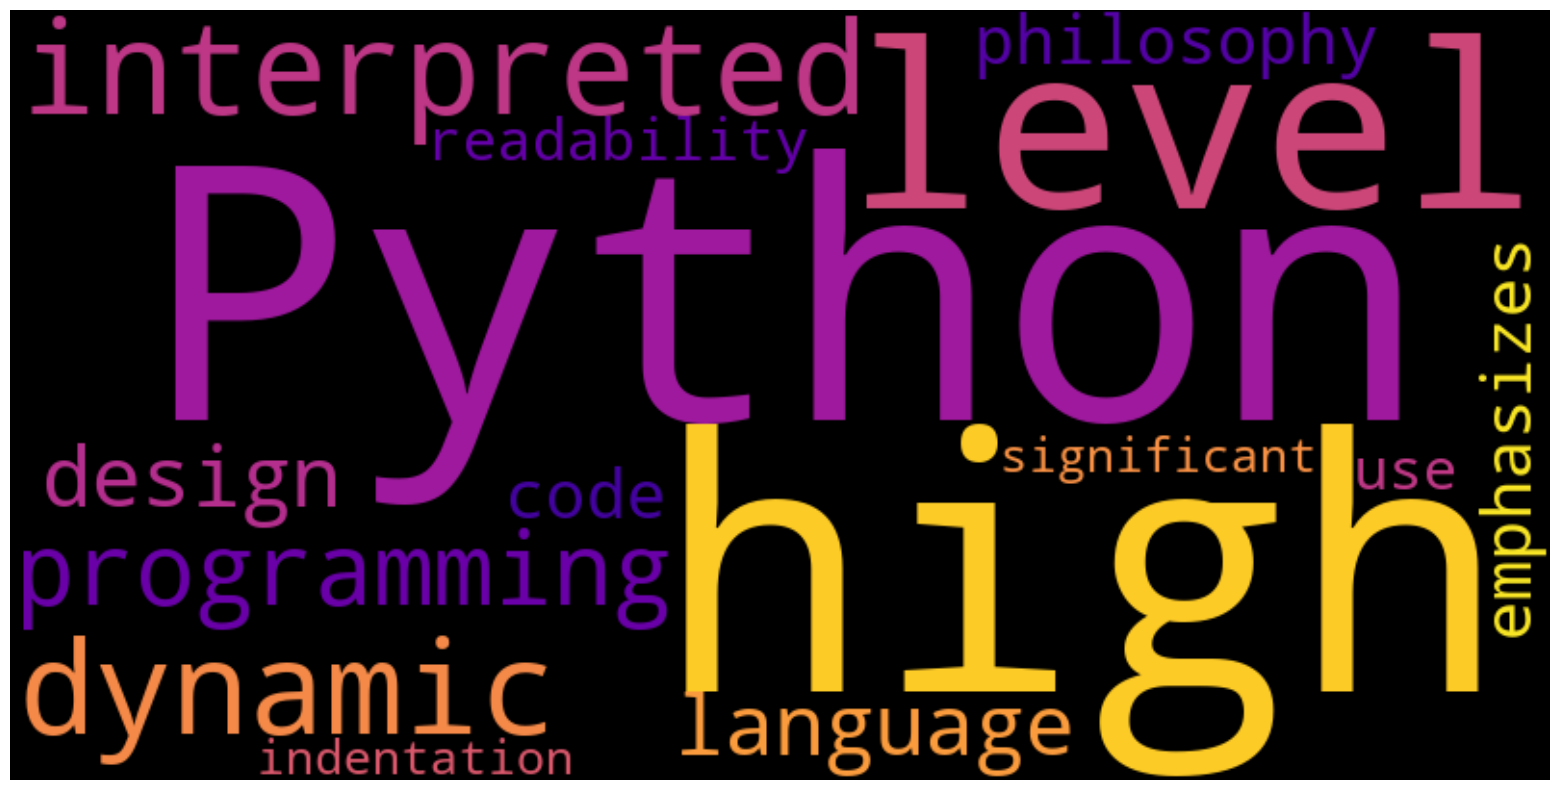

In [71]:
from wordcloud import STOPWORDS

text = """Python is a high-level, interpreted, and dynamic programming language. 
Its design philosophy emphasizes code readability with the use of significant indentation."""

# Define your custom stopwords
custom_stopwords = set(STOPWORDS)

# Create a WordCloud object with custom configurations
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    colormap='plasma',
    max_words=100, 
    contour_width=3, 
    contour_color='steelblue'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()